In [1]:
import pandas as pd

from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostRegressor,
    RandomForestRegressor
) 

from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt

from lemma_tokenizer import LemmaTokenizer
from prepare_dataset import process_data
from quantile_cut_order import QuantileCutOrder

In [2]:
#import nltk
#nltk.download('wordnet')

In [3]:
metrics = ["MAE", "RMSE", "R2", "Time"]
result_metrics = []
seed = 0

In [4]:
def evaluate_model(results:list, labels:list, decimal = 3) -> list:
    mae = mean_absolute_error(y_test, results)
    mse = mean_squared_error(y_test, results, squared = True)
    r2 = r2_score(y_test, results)
    
    return round(mae, decimal), round(mse, decimal), round(r2, decimal)

def get_model_name(model_type:str) -> str:
    
    if type(model_type) is not str:
        model_type = str(model_type)
        
    split = model_type.split("(")
    name = split[0]
    return name

def correlation_graph(results:list, 
                      labels:list, 
                      title:str,
                      colors = [(0.1, 0.2, 0.5),  (0.5, 0.2, 0.2)],
                      xlim:list = [75, 100],
                      legend = ["Results", "Labels"]):

    fig, ax = plt.subplots()
    values = [results, labels]
    
    
    for i in range(len(values)):
        sns.histplot(values[i], bins=range(75, 100, 1), ax=ax, color = colors[i], label = legend[i])
        
    ax.set_xlim(xlim)
    ax.set_title(title)
    ax.legend()
    
    return fig, ax

## Create Dataset

In [5]:
quantile_cut = [QuantileCutOrder(outlier_column = "price", per_category =  "country", quantile = 0.99)]
to_one_hot_encode = ["taster_name", "country"] #+ ["variety", "province"]
drop_duplicates = ['description','title']
fill_mean = ["price"]
drop = ["Unnamed: 0", "designation", "region_1", "region_2", "taster_twitter_handle", "title"]

X_train, X_test, y_train, y_test = process_data(load_dir = "dataset_sampled.csv", 
                                               label_column = "points", 
                                               text_column = "description", 
                                               quantile_cut = quantile_cut,
                                               to_one_hot_encode = to_one_hot_encode,
                                               drop_duplicates = drop_duplicates,
                                               to_ordinal_encode = ["variety", "province", "winery"],
                                                drop = drop,
                                               #fill_mean = ["price"],
                                               tf_idf_cutoff = 0,
                                               normalize = True,
                                               nlp_tool = None,
                                               tokenizer = LemmaTokenizer())

X_train

,price,province,variety,winery,taster_name_Alexander Peartree,taster_name_Anna Lee C. Iijima,taster_name_Anne Krebiehl MW,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Jeff Jenssen,...,country_Portugal,country_Romania,country_Serbia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Uruguay
2206,-0.086447,-0.904222,1.617197,1.208758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1755,-0.482441,-0.904222,-1.090350,0.965050,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4413,1.101538,-0.904222,-1.380859,1.574686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7466,0.359047,0.711763,0.141410,1.528579,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,-0.086447,1.469703,0.641086,-0.138589,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.299535,-0.904222,-1.380859,-1.201976,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4859,-0.333943,0.354244,0.710808,-0.477438,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,-0.556690,0.025327,0.873493,-1.397381,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,-0.111196,-0.947124,-1.090350,-0.626005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
quantile_cut = [QuantileCutOrder(outlier_column = "price", per_category =  "country", quantile = 0.99)]
to_one_hot_encode = ["taster_name", "country"] + ["variety", "province"]
drop_duplicates = ['description','title']
drop = ["Unnamed: 0", "designation", "region_1", "region_2", "taster_twitter_handle", "title", "winery"]

X_train, X_test, y_train, y_test = process_data(load_dir = "dataset_sampled.csv", 
                                               label_column = "points", 
                                               text_column = "description", 
                                               #quantile_cut = quantile_cut,
                                               to_one_hot_encode = to_one_hot_encode,
                                               drop_duplicates = drop_duplicates,
                                               drop = drop,
                                               tf_idf_cutoff = 0,
                                               fill_mean = ["price"],
                                               normalize = True,
                                               nlp_tool = None,
                                               tokenizer = LemmaTokenizer())

for col in X_train:
    
    if len(X_train[X_train["price"].isna()]) > 0:
        print(col)
#X_train[X_train["price"].isna()]
X_train

,price,taster_name_Alexander Peartree,taster_name_Anna Lee C. Iijima,taster_name_Anne Krebiehl MW,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Jeff Jenssen,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Kerin O’Keefe,...,province_Weinviertel,province_Wellington,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Sekt,province_Štajerska,province_Župa
2206,-0.088037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,-0.484239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4413,1.100568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7466,0.357690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,-0.088037,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.298669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4859,-0.335664,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,-0.558527,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,-0.112800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training time: 0.31666666666666665 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for SVR'}, xlabel='points', ylabel='Count'>)

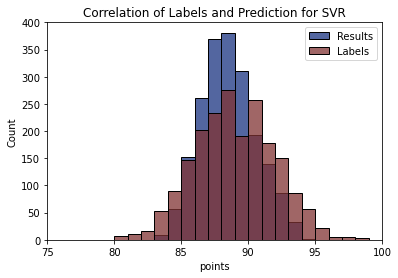

In [9]:
now = datetime.now()
model = SVR(C=1.0, epsilon=0.2)
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.03333333333333333 min


E:\Programme\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for LogisticRegression'}, xlabel='points', ylabel='Count'>)

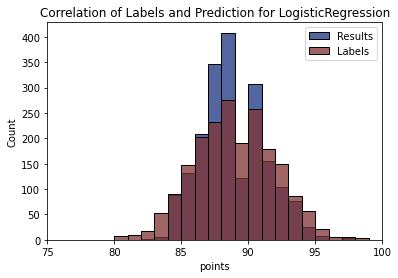

In [23]:
now = datetime.now()

model = LogisticRegression(random_state = seed, max_iter = 100)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.05 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for AdaBoostRegressor'}, xlabel='points', ylabel='Count'>)

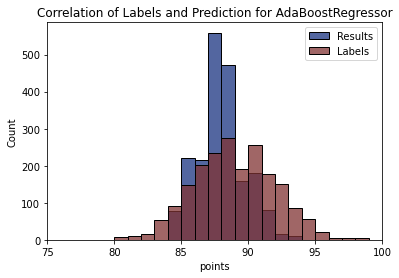

In [11]:
now = datetime.now()

model = AdaBoostRegressor(random_state=seed, n_estimators=100)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.13333333333333333 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for RandomForestRegressor'}, xlabel='points', ylabel='Count'>)

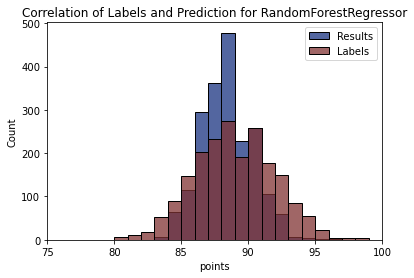

In [12]:
now = datetime.now()

model = RandomForestRegressor(max_depth=10, random_state=seed)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

In [24]:
##No NlP shallow one-hot-encoding + full ordinal, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.772,5.156,0.429,0.316667
1,LogisticRegression,1.917,6.150,0.319,0.033333
2,AdaBoostRegressor,1.992,6.036,0.332,0.050000
3,RandomForestRegressor,1.840,5.388,0.403,0.133333
4,LogisticRegression,1.938,6.381,0.294,0.000000
5,LogisticRegression,1.917,6.150,0.319,0.033333
6,LogisticRegression,1.921,6.180,0.316,0.066667
7,LogisticRegression,1.921,6.180,0.316,0.066667
8,LogisticRegression,1.921,6.180,0.316,0.066667
9,LogisticRegression,1.923,6.188,0.315,0.033333


In [14]:
##No NlP, full one-hot-encoding, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time


In [12]:
##No NlP shallow one-hot-encodings, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.804,5.319,0.411,0.05
1,LogisticRegression,1.918,6.043,0.331,0.00
2,AdaBoostRegressor,1.990,6.011,0.335,0.00
3,RandomForestRegressor,1.852,5.467,0.395,0.00


In [11]:
##tf-idfcutoff 0, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.334,8.190,0.063,6.683333
1,LogisticRegression,1.923,6.079,0.304,0.333333
2,AdaBoostRegressor,1.982,6.035,0.309,2.850000
3,RandomForestRegressor,1.845,5.421,0.379,7.633333


In [57]:
###bow, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.341,8.244,0.056,7.550000
1,LogisticRegression,2.014,6.648,0.239,0.416667
2,AdaBoostRegressor,1.959,5.880,0.327,2.266667
3,RandomForestRegressor,1.836,5.365,0.386,8.800000


In [48]:
#No NLP shallow one-hot-encodings, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.779,5.083,0.418,0.05
1,LogisticRegression,1.905,5.940,0.320,0.00
2,AdaBoostRegressor,1.947,5.805,0.335,0.00
3,RandomForestRegressor,1.806,5.203,0.404,0.00


In [39]:
#No NLP shallow one-hot-encodings, Not Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.876,5.623,0.356,0.050000
1,LogisticRegression,1.929,6.054,0.307,0.016667
2,AdaBoostRegressor,1.947,5.805,0.335,0.000000
3,RandomForestRegressor,1.806,5.200,0.405,0.000000


In [19]:
##tf-idf cutoff = 0.001, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.202,7.285,0.166,1.750000
1,LogisticRegression,1.940,6.104,0.301,0.083333
2,AdaBoostRegressor,1.985,6.027,0.310,0.883333
3,RandomForestRegressor,1.844,5.421,0.380,1.983333


In [9]:
##tf-idfcutoff = 0.005, Unscaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.876,5.617,0.357,0.100000
1,LogisticRegression,1.974,6.379,0.270,0.016667
2,AdaBoostRegressor,1.963,5.934,0.321,0.000000
3,RandomForestRegressor,1.838,5.384,0.384,0.066667
